# A notebook to characterise the output of k-means clustering of IAPs

Looking at: IAP type, preferential insertion, and minimum free energy calculations.

In [17]:
import pybiomart
import os
import pickle
import pandas as pd
import seaborn as sns
import pybedtools
import pybedtools.featurefuncs as featurefuncs
import umap
import numpy as np
from sklearn.preprocessing import maxabs_scale
import matplotlib.pyplot as plt
import matplotlib

In [4]:
clustered_df = pd.read_pickle("data/iap_clustered.pkl")
clustered_df

,chrom,start,end,element_id,length,strand,val_result,cluster_assignments
28,chr1,3031358,3031710,28,353,-,-1,B
182,chr1,3143092,3148151,182,5060,-,-1,B
1272,chr1,3997836,3998160,1272,325,-,-1,B
1427,chr1,4132179,4132516,1427,338,-,-1,B
1976,chr1,4556987,4559597,1976,2611,-,-1,D
...,...,...,...,...,...,...,...,...
4245666,chr9,123742716,123749810,4245666,7095,-,Tissue-specific,B
4245722,chr9,123783363,123788707,4245722,5345,+,-1,B
4246111,chr9,124080169,124082990,4246111,2822,+,Tissue-specific,B
4246418,chr9,124376688,124378655,4246418,1968,-,-1,D


In [6]:
mfe_df = pd.read_pickle("data/iap_mfe.pkl")
mfe_df = mfe_df.drop(['cluster_assignments'], axis=1)
mfe_df

,chrom,start,end,element_id,length,strand,val_result,mfe
151177,chr1,95057294,95057326,151177,33,-,Untested,-439.600006
25136,chr1,20055335,20055371,25136,37,-,Untested,-471.799988
159399,chr1,100567693,100567739,159399,47,+,Untested,-425.100006
160006,chr1,100931364,100931413,160006,50,+,Untested,-467.700012
91370,chr1,60586644,60586694,91370,51,-,Untested,-517.200012
...,...,...,...,...,...,...,...,...
4180871,chr9,92734665,92742098,4180871,7434,-,Untested,-609.799988
4041241,chr9,19763109,19770697,4041241,7589,-,Untested,-586.099976
4069873,chr9,36157171,36165366,4069873,8196,+,Untested,-534.599976
4041384,chr9,19897067,19906574,4041384,9508,+,Untested,-640.599976


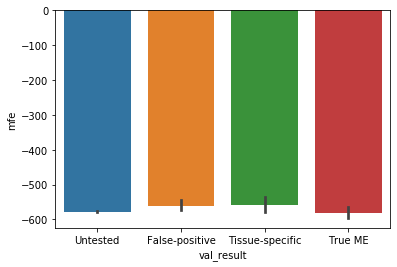

In [7]:
sns.barplot(x="val_result", y="mfe", data=mfe_df)

Text(0, 0.5, 'Minimum free energy of DNA duplex (kcal)')

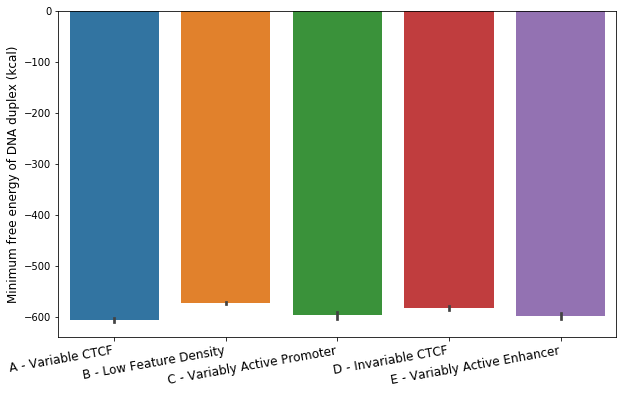

In [18]:
matplotlib.rcParams['figure.figsize'] = [10, 6]

clustered_df["mfe"] = mfe_df["mfe"]
label_order = ["A", "B", "C", "D", "E"]
ax = sns.barplot(x="cluster_assignments", y="mfe", order=label_order, data=clustered_df)

# Tweaking plot:
ax.set(xticklabels=["A - Variable CTCF", "B - Low Feature Density",
                    "C - Variably Active Promoter", "D - Invariable CTCF",
                    "E - Variably Active Enhancer"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, fontsize=12, horizontalalignment='right')
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Minimum free energy of DNA duplex (kcal)", fontsize=12)

In [13]:
import scipy.stats as stats
# p-value for 3 comparisons 0.166
stats.ttest_ind(clustered_df['mfe'][clustered_df['cluster_assignments'] == 'C'],
                clustered_df['mfe'][clustered_df['cluster_assignments'] == 'E'],
                nan_policy='omit')

Ttest_indResult(statistic=0.19752222453222548, pvalue=0.8434747954397337)